In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
data = pd.read_csv("champa.csv")

In [3]:
data.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
data.columns = ["Month", "Sales"]

In [5]:
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [6]:
data.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [7]:
data.dropna(axis = 0, inplace = True)

In [8]:
data.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [9]:
data["Month"] = pd.to_datetime(data["Month"])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   105 non-null    datetime64[ns]
 1   Sales   105 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.5 KB


In [11]:
data.set_index("Month", inplace = True)

In [12]:
data.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [13]:
data.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


In [14]:
data.isnull().sum()

Sales    0
dtype: int64

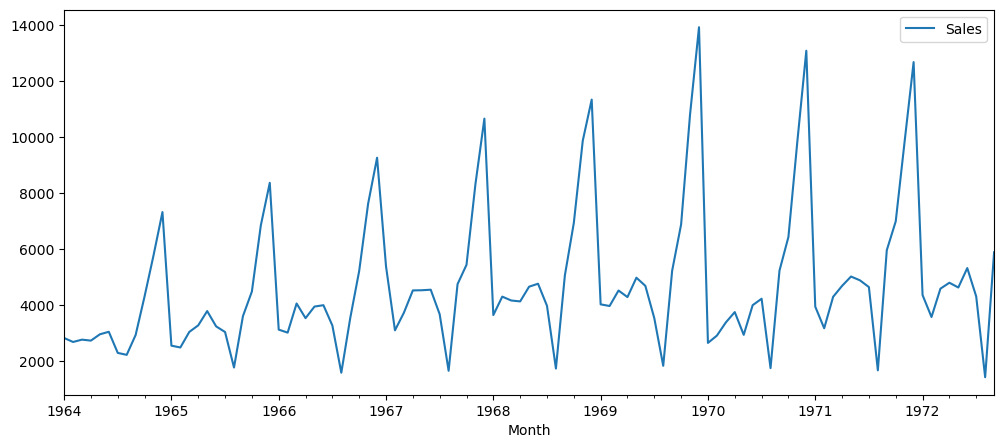

In [15]:
data.plot(figsize = (12, 5))
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def test(series):
    result = adfuller(series)
    ADF_Statistics = result[0]
    p_value = result[1]
    print(ADF_Statistics)
    print(p_value)
    if p_value <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
test(data["Sales"])

-1.833593056327623
0.363915771660245
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
data["Sales_First_Diff"] = data["Sales"] - data["Sales"].shift(1)

In [20]:
data.head(10)

,Sales,Sales_First_Diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0
1964-06-01,3036.0,90.0
1964-07-01,2282.0,-754.0
1964-08-01,2212.0,-70.0
1964-09-01,2922.0,710.0


In [21]:
data["Sales_1Y_Diff"] = data["Sales"] - data["Sales"].shift(12)

In [22]:
data.head(20)

,Sales,Sales_First_Diff,Sales_1Y_Diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [23]:
test(data["Sales_First_Diff"].dropna())

-7.189896448051016
2.519620447386879e-10
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


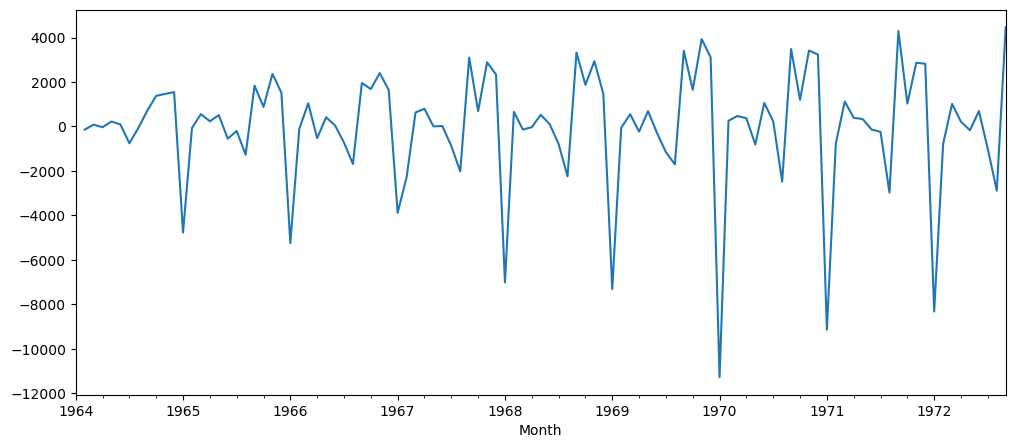

In [24]:
data["Sales_First_Diff"].plot(figsize = (12, 5))
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

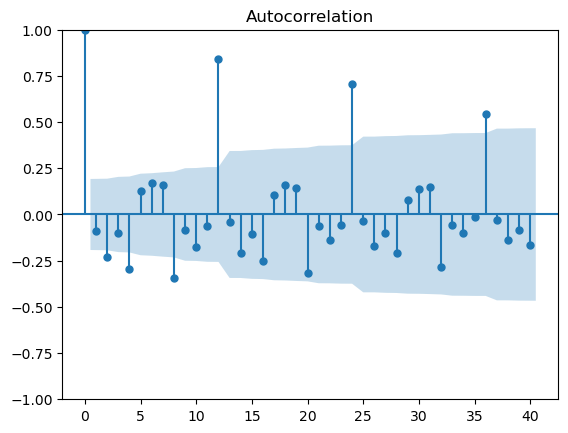

In [26]:
acf1 = plot_acf(data["Sales_First_Diff"].dropna(), lags = 40)
plt.show()

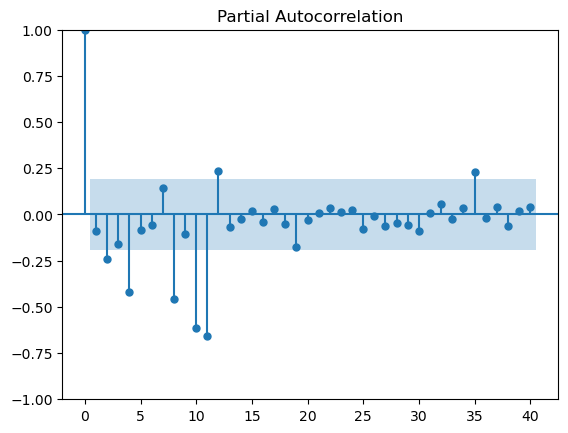

In [27]:
pacf1 = plot_pacf(data["Sales_First_Diff"].dropna(), lags = 40)
plt.show()

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model = ARIMA(data["Sales"], order = (1, 1, 1))
model_fit = model.fit()

C:\Users\Anaconda\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Tue, 05 Aug 2025   AIC                           1911.627
Time:                        20:35:27   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.316      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

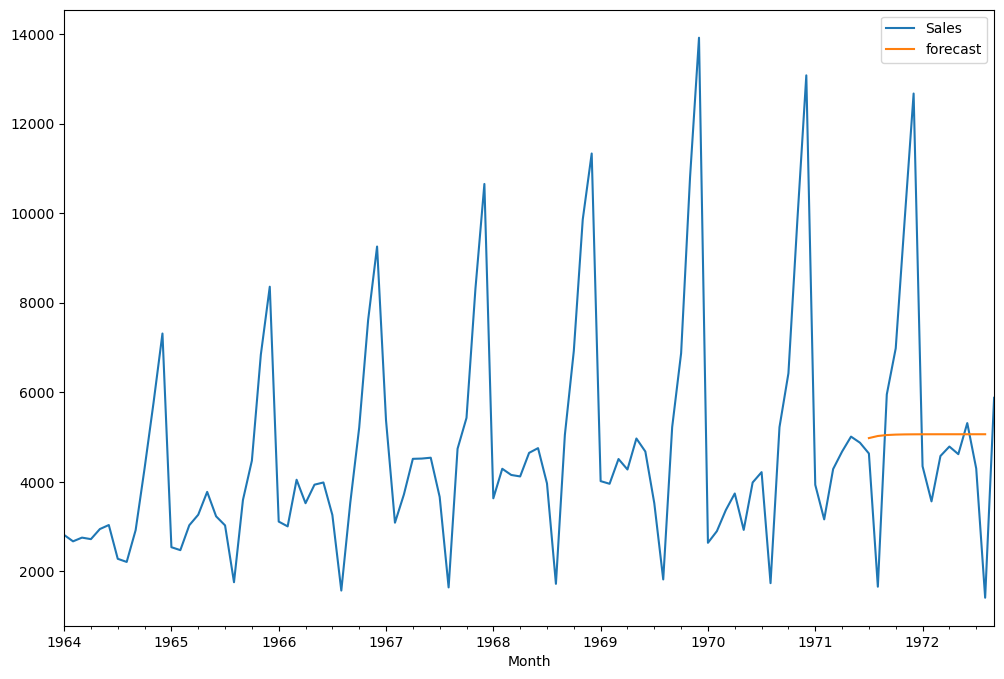

In [31]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

In [68]:
import statsmodels.api as sm

In [70]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Anaconda\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anaconda\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


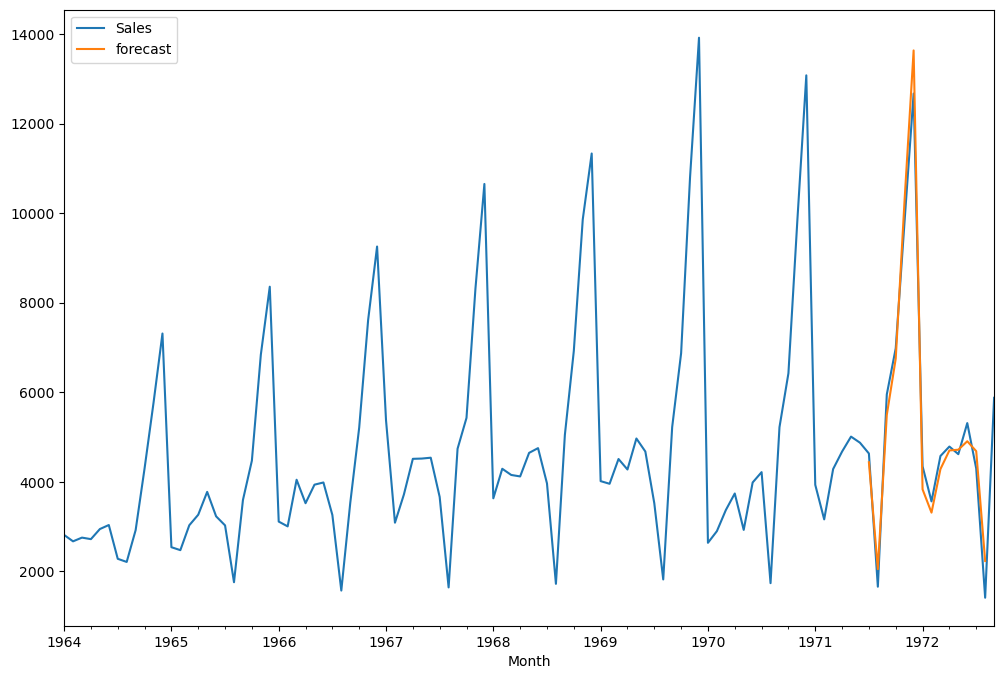

In [76]:
data['forecast']=results.predict(start=90,end=103,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))
plt.show()

In [80]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [84]:
future_datest_data=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [86]:
future_datest_data.tail()

,Sales,Sales_First_Diff,Sales_1Y_Diff,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [88]:
future_datest_data.shape

(23, 4)

In [94]:
future_df=pd.concat([data,future_datest_data])

C:\Users\sarvesh jathar\AppData\Local\Temp\ipykernel_1680\1551599390.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  future_df=pd.concat([data,future_datest_data])


In [100]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)).plt.plot()

AttributeError: 'Axes' object has no attribute 'plt'